### Importation des modules 

In [1]:
import numpy as np 
import pandas as pd
import math as m 
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import random
import seaborn as sns 
from datetime import datetime

## Ouverture de la base de données 

In [2]:
df_objets = pd.read_csv('objets-trouves-restitution.csv',sep=';')

In [3]:
df_objets.head()

,Date,Date et heure de restitution,Gare,Code UIC,Nature d'objets,Type d'objets,Type d'enregistrement
0,2018-08-16T08:46:55+02:00,2018-08-16T10:52:08+02:00,Nantes,87481002.0,Téléphone portable,"Appareils électroniques, informatiques, appare...",Objet trouvé
1,2018-08-16T08:50:34+02:00,NaN,Redon,87471300.0,"Casque (vélo, moto)","Vélos, trottinettes, accessoires 2 roues",Objet trouvé
2,2018-08-16T09:11:18+02:00,NaN,Béziers,87781005.0,"Sac d'enseigne (plastique, papier, …)","Bagagerie: sacs, valises, cartables",Objet trouvé
3,2018-08-16T09:19:47+02:00,NaN,Rennes,87471003.0,"Manteau, veste, blazer, parka, blouson, cape","Vêtements, chaussures",Objet trouvé
4,2018-08-16T09:23:18+02:00,NaN,Paris Montparnasse,87391003.0,Sac à dos,"Bagagerie: sacs, valises, cartables",Objet trouvé


## Analyse de la base de données  

### Informations globales

In [4]:
df_objets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907276 entries, 0 to 907275
Data columns (total 7 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Date                          907276 non-null  object 
 1   Date et heure de restitution  350898 non-null  object 
 2   Gare                          906197 non-null  object 
 3   Code UIC                      906197 non-null  float64
 4   Nature d'objets               907276 non-null  object 
 5   Type d'objets                 907276 non-null  object 
 6   Type d'enregistrement         907276 non-null  object 
dtypes: float64(1), object(6)
memory usage: 48.5+ MB


In [5]:
df_objets.describe(include=['object'])

,Date,Date et heure de restitution,Gare,Nature d'objets,Type d'objets,Type d'enregistrement
count,907276,350898,906197,907276,907276,907276
unique,904783,350213,181,132,16,1
top,2017-07-04T07:29:58+02:00,2023-09-27T02:00:22+02:00,Paris Gare de Lyon,"Porte-monnaie, portefeuille","Bagagerie: sacs, valises, cartables",Objet trouvé
freq,4,42,70984,82184,289118,907276


### Analyse de la mémoire vive consommée 

In [6]:
df_objets.memory_usage(index=True).sum()

50807584

In [7]:
df_objets.nunique()

Date                            904783
Date et heure de restitution    350213
Gare                               181
Code UIC                           181
Nature d'objets                    132
Type d'objets                       16
Type d'enregistrement                1
dtype: int64

### Analyse des doublons

In [8]:
doublons = df_objets.duplicated().sum()

# Affiche le nombre de doublons
print(f"Nombre de doublons : {doublons}")

f_objets = df_objets.drop_duplicates()

Nombre de doublons : 80


## Valeurs manquantes

### Analyse valeurs manquantes 

In [9]:
df_objets.isna().sum()

Date                                 0
Date et heure de restitution    556378
Gare                              1079
Code UIC                          1079
Nature d'objets                      0
Type d'objets                        0
Type d'enregistrement                0
dtype: int64

In [10]:
(df_objets.isna().sum()/len(df_objets['Gare']))*100

Date                             0.000000
Date et heure de restitution    61.324007
Gare                             0.118927
Code UIC                         0.118927
Nature d'objets                  0.000000
Type d'objets                    0.000000
Type d'enregistrement            0.000000
dtype: float64

In [11]:
df_objets[df_objets['Gare'].isna()].isna().sum()

Date                               0
Date et heure de restitution     893
Gare                            1079
Code UIC                        1079
Nature d'objets                    0
Type d'objets                      0
Type d'enregistrement              0
dtype: int64

In [12]:
df_objets = df_objets[df_objets['Gare'].notna()]



In [13]:
df_objets = df_objets.drop(columns=['Type d\'enregistrement'])

### Traitement des valeurs manquantes 

In [14]:
# Vérifie si chaque Gare a un unique Code UIC
gare_unique_uic = df_objets.groupby("Gare")["Code UIC"].nunique()
gare_incorrecte = gare_unique_uic[gare_unique_uic > 1]

# Vérifie si chaque Code UIC correspond à une unique Gare
uic_unique_gare = df_objets.groupby("Code UIC")["Gare"].nunique()
uic_incorrect = uic_unique_gare[uic_unique_gare > 1]

# Affiche les résultats
if not gare_incorrecte.empty:
    print("Incohérences trouvées pour les Gares avec plusieurs Codes UIC:")
    print(gare_incorrecte)
else:
    print("Chaque Gare a un unique Code UIC.")

if not uic_incorrect.empty:
    print("Incohérences trouvées pour les Codes UIC avec plusieurs Gares:")
    print(uic_incorrect)
else:
    print("Chaque Code UIC correspond à une unique Gare.")

Chaque Gare a un unique Code UIC.
Chaque Code UIC correspond à une unique Gare.


In [15]:
df_objets = df_objets.drop(columns=["Code UIC"])

In [16]:
df_objets

,Date,Date et heure de restitution,Gare,Nature d'objets,Type d'objets
0,2018-08-16T08:46:55+02:00,2018-08-16T10:52:08+02:00,Nantes,Téléphone portable,"Appareils électroniques, informatiques, appare..."
1,2018-08-16T08:50:34+02:00,NaN,Redon,"Casque (vélo, moto)","Vélos, trottinettes, accessoires 2 roues"
2,2018-08-16T09:11:18+02:00,NaN,Béziers,"Sac d'enseigne (plastique, papier, …)","Bagagerie: sacs, valises, cartables"
3,2018-08-16T09:19:47+02:00,NaN,Rennes,"Manteau, veste, blazer, parka, blouson, cape","Vêtements, chaussures"
4,2018-08-16T09:23:18+02:00,NaN,Paris Montparnasse,Sac à dos,"Bagagerie: sacs, valises, cartables"
...,...,...,...,...,...
907270,2024-08-30T21:13:31+02:00,NaN,Nîmes,"Téléphone portable protégé (étui, coque,…)","Appareils électroniques, informatiques, appare..."
907271,2024-08-30T19:59:22+02:00,2024-09-04T12:34:26+02:00,Strasbourg,"Valise, sac sur roulettes","Bagagerie: sacs, valises, cartables"
907272,2024-08-30T20:55:27+02:00,2024-09-05T12:49:08+02:00,Lille Europe,"Valise, sac sur roulettes","Bagagerie: sacs, valises, cartables"
907273,2024-08-30T23:23:44+02:00,NaN,Nîmes,Sac à dos,"Bagagerie: sacs, valises, cartables"


### Traitement des dates 

In [17]:
# Convertir les colonnes 'Date' et 'Date et heure de restitution' au format datetime avec UTC
df_objets['Date'] = pd.to_datetime(df_objets['Date'], utc=True)
df_objets['Date et heure de restitution'] = pd.to_datetime(df_objets['Date et heure de restitution'], utc=True)

# Filtrer les lignes où 'Date et heure de restitution' n'est pas NaT
valid_dates = df_objets['Date et heure de restitution'].notna()

# Vérifier que 'Date et heure de restitution' est après 'Date' uniquement pour les lignes valides
date_check = df_objets.loc[valid_dates, 'Date et heure de restitution'] > df_objets.loc[valid_dates, 'Date']

# Afficher le résultat
if date_check.all():
    print("Toutes les valeurs valides de 'Date et heure de restitution' sont après 'Date'.")
else:
    print("Certaines valeurs valides de 'Date et heure de restitution' ne sont pas après 'Date'.")
    print(df_objets.loc[valid_dates & ~date_check, ['Date', 'Date et heure de restitution']])

Toutes les valeurs valides de 'Date et heure de restitution' sont après 'Date'.


## Échantillonnage 

In [18]:
np.random.seed(345)


In [19]:
df_echan = df_objets.sample(n=100000,random_state=345).reset_index(drop=True)

df_echan

,Date,Date et heure de restitution,Gare,Nature d'objets,Type d'objets
0,2018-08-07 13:24:36+00:00,NaT,Montpellier Saint-Roch,Billets SNCF,Pièces d'identités et papiers personnels
1,2019-07-03 11:33:14+00:00,NaT,Rennes,"Valise, sac sur roulettes","Bagagerie: sacs, valises, cartables"
2,2021-06-25 16:32:18+00:00,2021-06-29 14:49:47+00:00,Montpellier Saint-Roch,"Porte-monnaie, portefeuille","Porte-monnaie / portefeuille, argent, titres"
3,2020-07-29 14:42:17+00:00,NaT,Lyon Perrache,"Porte-monnaie, portefeuille","Porte-monnaie / portefeuille, argent, titres"
4,2023-06-14 18:21:48+00:00,2023-08-11 12:22:20+00:00,Mantes-la-Jolie,Carte de crédit,"Porte-monnaie / portefeuille, argent, titres"
...,...,...,...,...,...
99995,2015-09-21 18:42:08+00:00,NaT,Paris Gare du Nord,"Manteau, veste, blazer, parka, blouson, cape","Vêtements, chaussures"
99996,2014-09-06 09:44:14+00:00,NaT,Caen,"Porte-monnaie, portefeuille","Porte-monnaie / portefeuille, argent, titres"
99997,2020-10-06 12:36:19+00:00,NaT,Paris Gare de Lyon,"Valise, sac sur roulettes","Bagagerie: sacs, valises, cartables"
99998,2016-06-20 11:45:39+00:00,NaT,Nancy,"Clés, porte-clés","Clés, porte-clés, badge magnétique"


## Requêtes 

### Objets les plus perdus

In [20]:
objets_plus_perdus = df_echan.groupby('Type d\'objets').count().sort_values(by='Nature d\'objets',ascending =False).reset_index().head(10)
objets_plus_perdus['Nature d\'objets']

0    31633
1    15391
2    12552
3    11613
4     8157
5     5202
6     4271
7     2201
8     2195
9     1545
Name: Nature d'objets, dtype: int64

### Objets les plus retrouvés

In [21]:
objets_plus_retrouves= df_echan[df_echan['Date et heure de restitution'].notna()].groupby('Type d\'objets').count().sort_values(by='Nature d\'objets',ascending =False).reset_index().head(10)
objets_plus_retrouves['Nature d\'objets']

0    17032
1     6977
2     6069
3     2398
4     2394
5      785
6      617
7      530
8      496
9      462
Name: Nature d'objets, dtype: int64

In [22]:
objets_plus_perdus['Objets perdus (en %)'] = round((objets_plus_perdus['Nature d\'objets']-objets_plus_retrouves['Nature d\'objets'])/objets_plus_perdus['Nature d\'objets']*100)

objets_plus_perdus

,Type d'objets,Date,Date et heure de restitution,Gare,Nature d'objets,Objets perdus (en %)
0,"Bagagerie: sacs, valises, cartables",31633,17032,31633,31633,46.0
1,"Appareils électroniques, informatiques, appare...",15391,6977,15391,15391,55.0
2,"Vêtements, chaussures",12552,2394,12552,12552,52.0
3,"Porte-monnaie / portefeuille, argent, titres",11613,6069,11613,11613,79.0
4,Pièces d'identités et papiers personnels,8157,2398,8157,8157,71.0
5,Optique,5202,617,5202,5202,85.0
6,"Clés, porte-clés, badge magnétique",4271,785,4271,4271,86.0
7,"Livres, articles de papéterie",2201,530,2201,2201,76.0
8,Divers,2195,462,2195,2195,77.0
9,"Vélos, trottinettes, accessoires 2 roues",1545,496,1545,1545,70.0


### Conversion du champ Date 

In [23]:
df_echan['Date'] = pd.to_datetime(df_echan['Date'])

# Extraire l'année, le mois, le jour, l'heure et la semaine ISO
df_echan['Year'] = df_echan['Date'].dt.year         # Année
df_echan['Month'] = df_echan['Date'].dt.month       # Mois
df_echan['Day'] = df_echan['Date'].dt.day           # Jour
df_echan['Hour'] = df_echan['Date'].dt.hour  # Heure:minute:seconde
df_echan['Week'] = df_echan['Date'].dt.isocalendar().week  # Semaine ISO

# Affichage des premières lignes pour vérifier les nouvelles colonnes
df_echan

,Date,Date et heure de restitution,Gare,Nature d'objets,Type d'objets,Year,Month,Day,Hour,Week
0,2018-08-07 13:24:36+00:00,NaT,Montpellier Saint-Roch,Billets SNCF,Pièces d'identités et papiers personnels,2018,8,7,13,32
1,2019-07-03 11:33:14+00:00,NaT,Rennes,"Valise, sac sur roulettes","Bagagerie: sacs, valises, cartables",2019,7,3,11,27
2,2021-06-25 16:32:18+00:00,2021-06-29 14:49:47+00:00,Montpellier Saint-Roch,"Porte-monnaie, portefeuille","Porte-monnaie / portefeuille, argent, titres",2021,6,25,16,25
3,2020-07-29 14:42:17+00:00,NaT,Lyon Perrache,"Porte-monnaie, portefeuille","Porte-monnaie / portefeuille, argent, titres",2020,7,29,14,31
4,2023-06-14 18:21:48+00:00,2023-08-11 12:22:20+00:00,Mantes-la-Jolie,Carte de crédit,"Porte-monnaie / portefeuille, argent, titres",2023,6,14,18,24
...,...,...,...,...,...,...,...,...,...,...
99995,2015-09-21 18:42:08+00:00,NaT,Paris Gare du Nord,"Manteau, veste, blazer, parka, blouson, cape","Vêtements, chaussures",2015,9,21,18,39
99996,2014-09-06 09:44:14+00:00,NaT,Caen,"Porte-monnaie, portefeuille","Porte-monnaie / portefeuille, argent, titres",2014,9,6,9,36
99997,2020-10-06 12:36:19+00:00,NaT,Paris Gare de Lyon,"Valise, sac sur roulettes","Bagagerie: sacs, valises, cartables",2020,10,6,12,41
99998,2016-06-20 11:45:39+00:00,NaT,Nancy,"Clés, porte-clés","Clés, porte-clés, badge magnétique",2016,6,20,11,25


### Création champ 'Plage_horaire'

In [24]:
df_echan['Plage_horaire'] = pd.cut(df_echan.Hour, bins = 6 , labels = ['[0:4]'
                                                                       ,'[4:8]'
                                                                       ,'[8:12]'
                                                                       ,'[12:16]'
                                                                       ,'[16:20]'
                                                                       ,'[20:24]'])

df_echan

,Date,Date et heure de restitution,Gare,Nature d'objets,Type d'objets,Year,Month,Day,Hour,Week,Plage_horaire
0,2018-08-07 13:24:36+00:00,NaT,Montpellier Saint-Roch,Billets SNCF,Pièces d'identités et papiers personnels,2018,8,7,13,32,[12:16]
1,2019-07-03 11:33:14+00:00,NaT,Rennes,"Valise, sac sur roulettes","Bagagerie: sacs, valises, cartables",2019,7,3,11,27,[8:12]
2,2021-06-25 16:32:18+00:00,2021-06-29 14:49:47+00:00,Montpellier Saint-Roch,"Porte-monnaie, portefeuille","Porte-monnaie / portefeuille, argent, titres",2021,6,25,16,25,[16:20]
3,2020-07-29 14:42:17+00:00,NaT,Lyon Perrache,"Porte-monnaie, portefeuille","Porte-monnaie / portefeuille, argent, titres",2020,7,29,14,31,[12:16]
4,2023-06-14 18:21:48+00:00,2023-08-11 12:22:20+00:00,Mantes-la-Jolie,Carte de crédit,"Porte-monnaie / portefeuille, argent, titres",2023,6,14,18,24,[16:20]
...,...,...,...,...,...,...,...,...,...,...,...
99995,2015-09-21 18:42:08+00:00,NaT,Paris Gare du Nord,"Manteau, veste, blazer, parka, blouson, cape","Vêtements, chaussures",2015,9,21,18,39,[16:20]
99996,2014-09-06 09:44:14+00:00,NaT,Caen,"Porte-monnaie, portefeuille","Porte-monnaie / portefeuille, argent, titres",2014,9,6,9,36,[8:12]
99997,2020-10-06 12:36:19+00:00,NaT,Paris Gare de Lyon,"Valise, sac sur roulettes","Bagagerie: sacs, valises, cartables",2020,10,6,12,41,[12:16]
99998,2016-06-20 11:45:39+00:00,NaT,Nancy,"Clés, porte-clés","Clés, porte-clés, badge magnétique",2016,6,20,11,25,[8:12]


### Création du champ 'Returned'

In [25]:
df_echan['Returned'] = df_echan['Date et heure de restitution'].apply(lambda x : 1 if pd.notna(x) else 0)


In [26]:
df_echan = df_echan.drop(columns = ['Date et heure de restitution','Date'])


### Comparaison des pourcentages suivant le type d'objet et le retour ou non de l'objet

In [27]:
df_step_1 = df_echan.groupby('Type d\'objets').count().reset_index()

df_step_1 = df_step_1.rename(columns = {'Returned':'Total cas'})

df_step_1 = df_step_1.drop(columns = ['Gare','Nature d\'objets','Hour','Day','Month','Year','Week','Plage_horaire'])

df_step_1

,Type d'objets,Total cas
0,"Appareils électroniques, informatiques, appare...",15391
1,"Articles d'enfants, de puériculture",1124
2,"Articles de sport, loisirs, camping",1295
3,Articles médicaux,543
4,"Bagagerie: sacs, valises, cartables",31633
5,"Bijoux, montres",969
6,"Clés, porte-clés, badge magnétique",4271
7,Divers,2195
8,Instruments de musique,261
9,"Livres, articles de papéterie",2201


In [28]:
df_perc = df_echan.groupby(['Type d\'objets','Returned']).count().reset_index()
df_perc

,Type d'objets,Returned,Gare,Nature d'objets,Year,Month,Day,Hour,Week,Plage_horaire
0,"Appareils électroniques, informatiques, appare...",0,8414,8414,8414,8414,8414,8414,8414,8414
1,"Appareils électroniques, informatiques, appare...",1,6977,6977,6977,6977,6977,6977,6977,6977
2,"Articles d'enfants, de puériculture",0,875,875,875,875,875,875,875,875
3,"Articles d'enfants, de puériculture",1,249,249,249,249,249,249,249,249
4,"Articles de sport, loisirs, camping",0,1030,1030,1030,1030,1030,1030,1030,1030
5,"Articles de sport, loisirs, camping",1,265,265,265,265,265,265,265,265
6,Articles médicaux,0,407,407,407,407,407,407,407,407
7,Articles médicaux,1,136,136,136,136,136,136,136,136
8,"Bagagerie: sacs, valises, cartables",0,14601,14601,14601,14601,14601,14601,14601,14601
9,"Bagagerie: sacs, valises, cartables",1,17032,17032,17032,17032,17032,17032,17032,17032


In [29]:
df_perc = df_perc.drop(columns = ['Gare','Hour','Day','Month','Year','Week','Plage_horaire'])

df_perc

,Type d'objets,Returned,Nature d'objets
0,"Appareils électroniques, informatiques, appare...",0,8414
1,"Appareils électroniques, informatiques, appare...",1,6977
2,"Articles d'enfants, de puériculture",0,875
3,"Articles d'enfants, de puériculture",1,249
4,"Articles de sport, loisirs, camping",0,1030
5,"Articles de sport, loisirs, camping",1,265
6,Articles médicaux,0,407
7,Articles médicaux,1,136
8,"Bagagerie: sacs, valises, cartables",0,14601
9,"Bagagerie: sacs, valises, cartables",1,17032


In [30]:
df_perc = df_perc.merge(df_step_1,on = 'Type d\'objets')

df_perc

,Type d'objets,Returned,Nature d'objets,Total cas
0,"Appareils électroniques, informatiques, appare...",0,8414,15391
1,"Appareils électroniques, informatiques, appare...",1,6977,15391
2,"Articles d'enfants, de puériculture",0,875,1124
3,"Articles d'enfants, de puériculture",1,249,1124
4,"Articles de sport, loisirs, camping",0,1030,1295
5,"Articles de sport, loisirs, camping",1,265,1295
6,Articles médicaux,0,407,543
7,Articles médicaux,1,136,543
8,"Bagagerie: sacs, valises, cartables",0,14601,31633
9,"Bagagerie: sacs, valises, cartables",1,17032,31633


In [31]:
df_perc['% returned'] = round((df_perc['Nature d\'objets']/df_perc['Total cas'])*100,0)
df_perc

,Type d'objets,Returned,Nature d'objets,Total cas,% returned
0,"Appareils électroniques, informatiques, appare...",0,8414,15391,55.0
1,"Appareils électroniques, informatiques, appare...",1,6977,15391,45.0
2,"Articles d'enfants, de puériculture",0,875,1124,78.0
3,"Articles d'enfants, de puériculture",1,249,1124,22.0
4,"Articles de sport, loisirs, camping",0,1030,1295,80.0
5,"Articles de sport, loisirs, camping",1,265,1295,20.0
6,Articles médicaux,0,407,543,75.0
7,Articles médicaux,1,136,543,25.0
8,"Bagagerie: sacs, valises, cartables",0,14601,31633,46.0
9,"Bagagerie: sacs, valises, cartables",1,17032,31633,54.0


## Analyse graphique 

### Construction Graphiques

<Figure size 720x432 with 0 Axes>

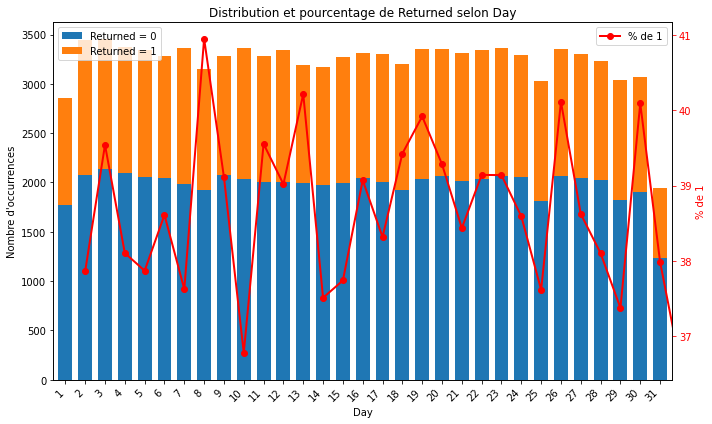

<Figure size 720x432 with 0 Axes>

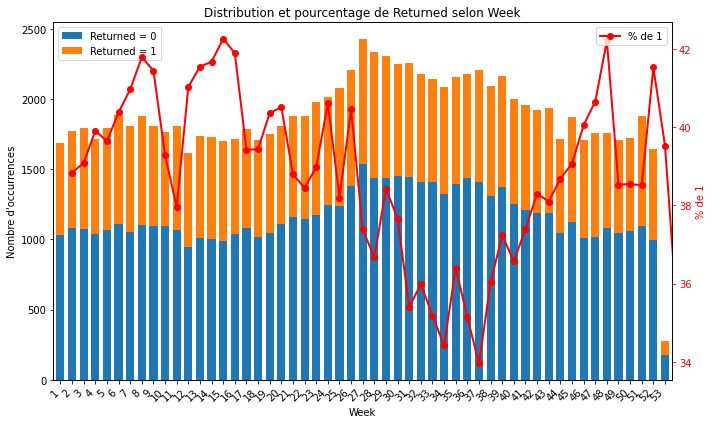

<Figure size 720x432 with 0 Axes>

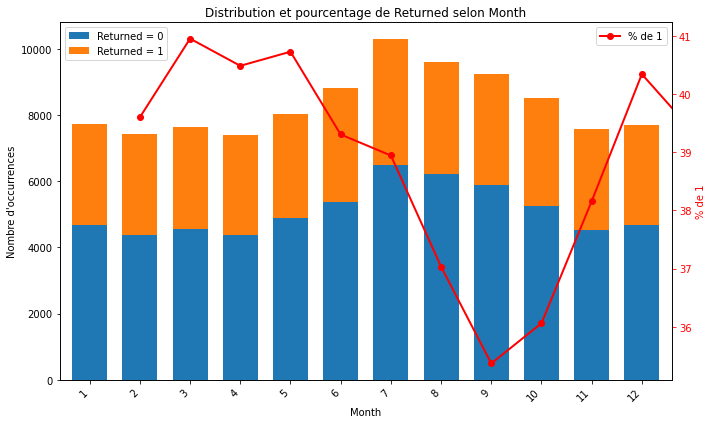

<Figure size 720x432 with 0 Axes>

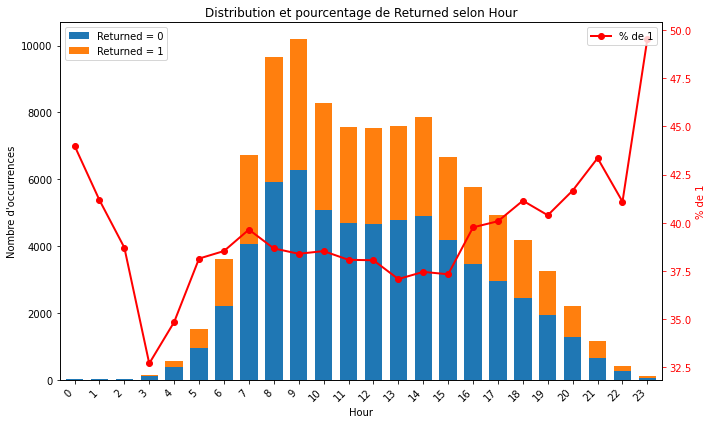

<Figure size 720x432 with 0 Axes>

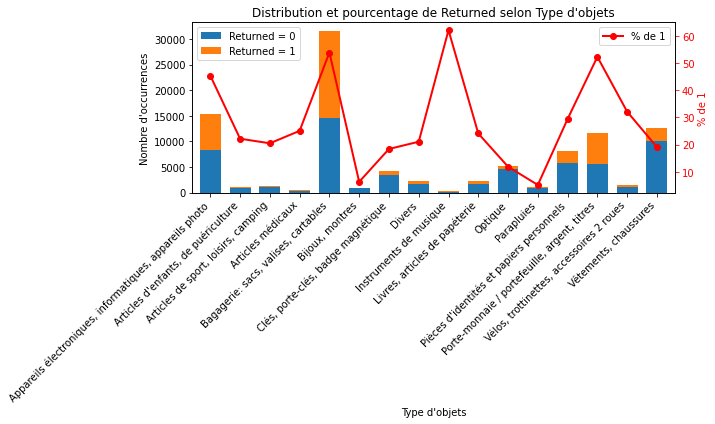

In [32]:
import matplotlib.pyplot as plt

# Liste des attributs à analyser
attributes = ['Day', 'Week', 'Month', 'Hour', 'Type d\'objets']

# Générer un graphique pour chaque attribut
for attribute in attributes:
    plt.figure(figsize=(10, 6))
    
    # Compter les occurrences de 0 et 1 dans 'Returned' pour chaque valeur de l'attribut
    counts = df_echan.groupby([attribute, 'Returned']).size().unstack(fill_value=0)
    
    # Calculer le pourcentage de 1
    total_counts = counts.sum(axis=1)
    percentage_1 = (counts[1] / total_counts) * 100
    
    # Créer les axes
    fig, ax1 = plt.subplots(figsize=(10, 6))
    ax2 = ax1.twinx()  # Second axe pour le pourcentage
    
    # Tracer le graphique à barres empilées sur le premier axe
    counts.plot(kind='bar', stacked=True, ax=ax1, color=['#1f77b4', '#ff7f0e'], width=0.7)
    ax1.set_ylabel("Nombre d'occurrences")
    ax1.set_xlabel(attribute)
    
    # Tracer le pourcentage de 1 en ligne sur le second axe
    percentage_1.plot(ax=ax2, color='red', marker='o', linestyle='-', linewidth=2, label='% de 1')
    ax2.set_ylabel("% de 1", color='red')
    ax2.tick_params(axis='y', colors='red')
    
    # Ajouter un titre
    plt.title(f"Distribution et pourcentage de Returned selon {attribute}")
    
    # Ajuster les étiquettes de l'axe x
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right")
    
    # Légende
    ax1.legend(['Returned = 0', 'Returned = 1'], loc='upper left')
    ax2.legend(loc='upper right')
    
    # Ajuster les marges
    plt.tight_layout()
    
    # Afficher le graphique
    plt.show()

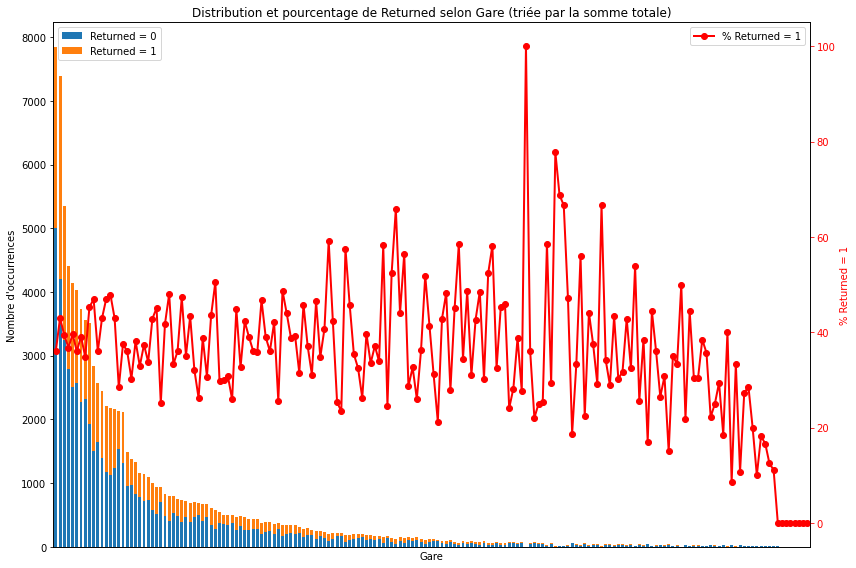

In [33]:
# Compter les occurrences de 0 et 1 dans 'Returned' pour chaque valeur de 'Gare'
counts_gare = df_echan.groupby(['Gare', 'Returned']).size().unstack(fill_value=0)

# Calculer le pourcentage de 'Returned = 1' pour chaque gare
counts_gare['Percentage_Returned_1'] = (counts_gare[1] / counts_gare.sum(axis=1)) * 100

# Ajouter une colonne temporaire pour le tri en fonction de la somme totale (0 + 1)
counts_gare['Total'] = counts_gare.sum(axis=1)

# Trier les valeurs du plus grand au plus petit selon la somme totale
counts_gare = counts_gare.sort_values(by='Total', ascending=False)

# Supprimer la colonne temporaire 'Total' après le tri
counts_gare = counts_gare.drop(columns='Total')

# Tracer le graphique à barres empilées
plt.figure(figsize=(12, 8))
ax1 = plt.gca()
counts_gare[[0, 1]].plot(kind='bar', stacked=True, ax=ax1, color=['#1f77b4', '#ff7f0e'], width=0.7)

# Tracer le pourcentage de 'Returned = 1' sur un second axe
ax2 = ax1.twinx()
counts_gare['Percentage_Returned_1'].plot(
    ax=ax2, 
    color='red', 
    marker='o', 
    linestyle='-', 
    linewidth=2, 
    label='% Returned = 1'
)

# Ajuster les axes
ax1.set_ylabel("Nombre d'occurrences")
ax2.set_ylabel("% Returned = 1", color='red')
ax2.tick_params(axis='y', colors='red')

# Supprimer les étiquettes de l'axe des abscisses
ax1.set_xticklabels([])
ax1.set_xticks([])

# Ajouter un titre
plt.title("Distribution et pourcentage de Returned selon Gare (triée par la somme totale)")

# Légende
ax1.legend(['Returned = 0', 'Returned = 1'], loc='upper left')
ax2.legend(loc='upper right')

# Ajuster les marges
plt.tight_layout()

# Afficher le graphique
plt.show()


## Création des modèles 

In [34]:
from sklearn.model_selection import train_test_split

# Supposons que l'échantillon est stocké dans un DataFrame nommé `df_sample`
# Diviser les données en 2/3 pour l'entraînement et 1/3 pour le test
train_data, test_data = train_test_split(df_echan, test_size=1/3, random_state=42)

Rapport de classification :
              precision    recall  f1-score   support

           0       0.73      0.67      0.70     20343
           1       0.54      0.60      0.57     12991

    accuracy                           0.64     33334
   macro avg       0.63      0.64      0.63     33334
weighted avg       0.65      0.64      0.65     33334

Précision : 0.6442
ROC AUC : 0.6860

Matrice de confusion :
[[13644  6699]
 [ 5160  7831]]


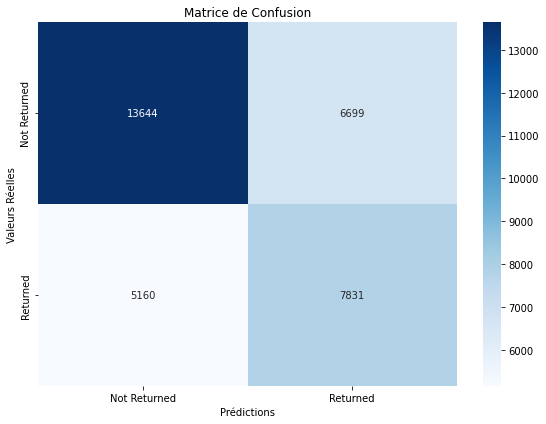


Coefficients du modèle :
                                              Feature  Coefficient
9           cat__Type d'objets_Instruments de musique     1.400960
5   cat__Type d'objets_Bagagerie: sacs, valises, c...     1.189391
14  cat__Type d'objets_Porte-monnaie / portefeuill...     1.135992
1   cat__Type d'objets_Appareils électroniques, in...     0.866021
15  cat__Type d'objets_Vélos, trottinettes, access...     0.301659
13  cat__Type d'objets_Pièces d'identités et papie...     0.150451
0                                           num__Hour     0.023163
4                cat__Type d'objets_Articles médicaux    -0.122436
10   cat__Type d'objets_Livres, articles de papéterie    -0.136529
2   cat__Type d'objets_Articles d'enfants, de puér...    -0.222496
8                           cat__Type d'objets_Divers    -0.273775
3   cat__Type d'objets_Articles de sport, loisirs,...    -0.358757
16           cat__Type d'objets_Vêtements, chaussures    -0.405480
7   cat__Type d'objets_Clés, porte-c

In [35]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix

# Sélection des colonnes
features = ['Type d\'objets', 'Hour']
target = 'Returned'

# Préparer les ensembles d'entraînement et de test
X_train = train_data[features]
y_train = train_data[target]

X_test = test_data[features]
y_test = test_data[target]

# Encodage et standardisation
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Hour']),  # Standardiser Hour
        ('cat', OneHotEncoder(), ['Type d\'objets'])  # Encodage OneHot pour Type d'objets
    ]
)

# Transformation des données
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Régression logistique
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_transformed, y_train)

# Prédictions
y_pred = model.predict(X_test_transformed)
y_prob = model.predict_proba(X_test_transformed)[:, 1]  # Probabilités pour ROC AUC

# Évaluation du modèle
print("Rapport de classification :")
print(classification_report(y_test, y_pred))

print(f"Précision : {accuracy_score(y_test, y_pred):.4f}")
print(f"ROC AUC : {roc_auc_score(y_test, y_prob):.4f}")

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nMatrice de confusion :")
print(conf_matrix)

# Affichage de la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Returned', 'Returned'], yticklabels=['Not Returned', 'Returned'])
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Valeurs Réelles')
plt.tight_layout()
plt.show()

# Affichage des coefficients du modèle
feature_names = preprocessor.get_feature_names_out()
coefficients = pd.DataFrame(
    {"Feature": feature_names, "Coefficient": model.coef_[0]}
).sort_values(by="Coefficient", ascending=False)

print("\nCoefficients du modèle :")
print(coefficients)


## Ajout de données 

In [44]:
df_pop_gares = pd.read_csv('frequentation-gares.csv',sep=';')

df_pop_gares

,Nom de la gare,Code UIC,Code postal,Segmentation DRG,Total Voyageurs 2023,Total Voyageurs + Non voyageurs 2023,Total Voyageurs 2022,Total Voyageurs + Non voyageurs 2022,Total Voyageurs 2021,Total Voyageurs + Non voyageurs 2021,...,Total Voyageurs 2019,Total Voyageurs + Non voyageurs 2019,Total Voyageurs 2018,Total Voyageurs + Non voyageurs 2018,Total Voyageurs 2017,Total Voyageurs + Non voyageurs 2017,Total Voyageurs 2016,Total Voyageurs + Non voyageurs 2016,Total Voyageurs 2015,Total Voyageurs + Non voyageurs 2015
0,Abancourt,87313759,60220,C,77974,77974,71517,71517,51811,51811,...,42685,42685,40228,40228,43760,43760,41096,41096,39720,39720
1,Aéroport Charles de Gaulle 2 TGV,87271494,93290,A,15394518,15449822,12949183,12999716,6281244,6312246,...,15227840,15283854,14907773,14961932,14649835,14704083,13534634,13581113,12976556,13021148
2,Agde,87781278,34300,B,757491,946864,689202,861503,561160,701450,...,542288,677860,588297,735372,697091,871364,660656,825820,662516,828146
3,Agen,87586008,47000,A,1640325,2050407,1540511,1925639,1184007,1480009,...,1211323,1514154,1109199,1386499,1194455,1493068,1141620,1427026,1183150,1478938
4,Agonac,87595157,24460,C,9537,9537,6468,6468,4119,4119,...,2538,2538,1492,1492,1583,1583,1134,1134,1127,1127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3005,Wissembourg,87213470,67160,B,253716,317145,250964,313706,186578,233222,...,206134,257667,194074,242593,200694,250868,187709,234636,194148,242686
3006,Wittring,87193656,57137,C,1362,1362,1927,1927,3101,3101,...,6744,6744,7293,7293,9824,9824,13676,13676,15023,15023
3007,Ychoux,87582536,40160,B,219131,273914,182592,228240,133910,167388,...,142217,177771,114265,142831,106731,133414,94468,118086,96735,120919
3008,Yvetot,87413385,76190,B,1188814,1486017,1039150,1298937,787592,984491,...,997167,1246459,902928,1128661,920117,1150146,909234,1136542,934997,1168746


In [ ]:
np.random.seed(345)

In [49]:
df_echan_2 = pd.read_csv('objets-trouves-restitution.csv',sep=';').sample(n=100000,random_state=345).reset_index(drop=True)

df_echan_2

,Date,Date et heure de restitution,Gare,Code UIC,Nature d'objets,Type d'objets,Type d'enregistrement
0,2022-09-19T11:43:39+02:00,NaN,Chambéry - Challes-les-Eaux,87741009.0,Sac à dos,"Bagagerie: sacs, valises, cartables",Objet trouvé
1,2022-11-21T11:39:39+01:00,NaN,Paris Est,87113001.0,"Sacoche ventrale, banane","Bagagerie: sacs, valises, cartables",Objet trouvé
2,2017-10-11T10:41:54+02:00,NaN,Rennes,87471003.0,"Manteau, veste, blazer, parka, blouson, cape","Vêtements, chaussures",Objet trouvé
3,2023-08-19T11:18:15+02:00,NaN,Nîmes,87775007.0,Bracelet,"Bijoux, montres",Objet trouvé
4,2021-04-27T06:26:33+02:00,NaN,Paris Gare de Lyon,87686006.0,"AirPod, casque audio, écouteurs","Appareils électroniques, informatiques, appare...",Objet trouvé
...,...,...,...,...,...,...,...
99995,2014-03-18T10:37:25+01:00,NaN,Vichy,87732008.0,Autres divers,Divers,Objet trouvé
99996,2024-08-22T22:28:58+02:00,NaN,Angers Saint-Laud,87484006.0,"Clés, porte-clés","Clés, porte-clés, badge magnétique",Objet trouvé
99997,2021-09-17T11:34:30+02:00,NaN,Nice,87756056.0,"Porte-monnaie, portefeuille","Porte-monnaie / portefeuille, argent, titres",Objet trouvé
99998,2015-11-05T11:20:35+01:00,NaN,Brive-la-Gaillarde,87594002.0,"Porte-monnaie, portefeuille","Porte-monnaie / portefeuille, argent, titres",Objet trouvé


In [50]:
df_echan_2['Code UIC'] = round(df_echan_2['Code UIC'],0)

In [51]:
df_echan_2 = pd.merge(df_echan_2,df_pop_gares,on='Code UIC',how='left')

df_echan_2

,Date,Date et heure de restitution,Gare,Code UIC,Nature d'objets,Type d'objets,Type d'enregistrement,Nom de la gare,Code postal,Segmentation DRG,...,Total Voyageurs 2019,Total Voyageurs + Non voyageurs 2019,Total Voyageurs 2018,Total Voyageurs + Non voyageurs 2018,Total Voyageurs 2017,Total Voyageurs + Non voyageurs 2017,Total Voyageurs 2016,Total Voyageurs + Non voyageurs 2016,Total Voyageurs 2015,Total Voyageurs + Non voyageurs 2015
0,2022-09-19T11:43:39+02:00,NaN,Chambéry - Challes-les-Eaux,87741009.0,Sac à dos,"Bagagerie: sacs, valises, cartables",Objet trouvé,Chambéry - Challes-les-Eaux,73010.0,A,...,3701807.0,4627258.0,3447007.0,4308759.0,3781533.0,4726917.0,3624235.0,4530294.0,3782600.0,4728250.0
1,2022-11-21T11:39:39+01:00,NaN,Paris Est,87113001.0,"Sacoche ventrale, banane","Bagagerie: sacs, valises, cartables",Objet trouvé,Paris Est,75010.0,A,...,41240098.0,52060520.0,39301206.0,49612908.0,38455354.0,48545125.0,35820125.0,45218475.0,34919689.0,44081786.0
2,2017-10-11T10:41:54+02:00,NaN,Rennes,87471003.0,"Manteau, veste, blazer, parka, blouson, cape","Vêtements, chaussures",Objet trouvé,Rennes,35005.0,A,...,11588429.0,15451239.0,10418643.0,13891525.0,10381870.0,13842494.0,9411458.0,12548611.0,9437542.0,12583389.0
3,2023-08-19T11:18:15+02:00,NaN,Nîmes,87775007.0,Bracelet,"Bijoux, montres",Objet trouvé,Nîmes,30000.0,A,...,3585941.0,5976568.0,3669749.0,6116249.0,4105151.0,6841918.0,3937669.0,6562782.0,3794045.0,6323409.0
4,2021-04-27T06:26:33+02:00,NaN,Paris Gare de Lyon,87686006.0,"AirPod, casque audio, écouteurs","Appareils électroniques, informatiques, appare...",Objet trouvé,Paris Gare de Lyon,75012.0,A,...,112644337.0,140121852.0,111226947.0,137769853.0,113962625.0,141761340.0,111664289.0,138682324.0,111506043.0,138936295.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2014-03-18T10:37:25+01:00,NaN,Vichy,87732008.0,Autres divers,Divers,Objet trouvé,Vichy,3200.0,B,...,1309834.0,1540981.0,1193916.0,1404607.0,1295130.0,1523682.0,1218692.0,1433755.0,1265848.0,1489233.0
99996,2024-08-22T22:28:58+02:00,NaN,Angers Saint-Laud,87484006.0,"Clés, porte-clés","Clés, porte-clés, badge magnétique",Objet trouvé,Angers Saint-Laud,49100.0,A,...,5739760.0,8830401.0,5372470.0,8265338.0,5647027.0,8687733.0,5368048.0,8258536.0,5411683.0,8325666.0
99997,2021-09-17T11:34:30+02:00,NaN,Nice,87756056.0,"Porte-monnaie, portefeuille","Porte-monnaie / portefeuille, argent, titres",Objet trouvé,Nice,6008.0,A,...,9517119.0,11066418.0,8415150.0,9785058.0,9028045.0,10497727.0,8030193.0,9337434.0,8394842.0,9761445.0
99998,2015-11-05T11:20:35+01:00,NaN,Brive-la-Gaillarde,87594002.0,"Porte-monnaie, portefeuille","Porte-monnaie / portefeuille, argent, titres",Objet trouvé,Brive-la-Gaillarde,19100.0,A,...,810034.0,1012543.0,758883.0,948604.0,864600.0,1080750.0,836580.0,1045725.0,890457.0,1113072.0


In [54]:
df_echan_2.dtypes

Date                                     object
Date et heure de restitution             object
Gare                                     object
Code UIC                                float64
Nature d'objets                          object
Type d'objets                            object
Type d'enregistrement                    object
Nom de la gare                           object
Code postal                             float64
Segmentation DRG                         object
Total Voyageurs 2023                    float64
Total Voyageurs + Non voyageurs 2023    float64
Total Voyageurs 2022                    float64
Total Voyageurs + Non voyageurs 2022    float64
Total Voyageurs 2021                    float64
Total Voyageurs + Non voyageurs 2021    float64
Total Voyageurs 2020                    float64
Total Voyageurs + Non voyageurs 2020    float64
Total Voyageurs 2019                    float64
Total Voyageurs + Non voyageurs 2019    float64
Total Voyageurs 2018                    